In [3]:
import numpy as np
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import pandas as pd


In [4]:
data = pd.read_csv("digit-recognizer/train.csv")
# print(data.head())
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [19]:
# print(data['label'][0])

1


In [37]:
### process data
train, label = np.zeros((data.shape[0], data.shape[1]-1)), np.zeros(data.shape[0])
for i in range(data.shape[0]):
    train[i] = data.loc[i][1:].to_numpy()
    label[i] = data['label'][i]

5.0


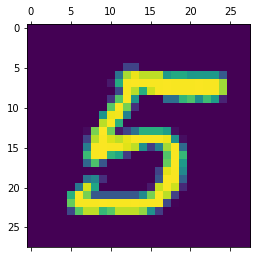

In [40]:
from matplotlib import pyplot  as plt

plt.matshow(np.reshape(np.array(train[301]), (28, 28)))
print(label[301])

In [62]:
model = keras.Sequential(
    [
        layers.Dense(125, activation = "relu", input_shape=(784,)),
        layers.Dense(35, activation = "relu"),
        layers.Dense(10, activation = "softmax")
    ]
)

In [63]:
model.compile(
    optimizer = "adam",
    loss =  tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)


In [66]:
model.fit(x = train,  y = label, validation_split = 0.1, batch_size = 25, epochs = 2)

Epoch 1/2
1512/1512 [==============================] - 5s 3ms/step - loss: 0.0989 - accuracy: 0.9739 - val_loss: 0.2426 - val_accuracy: 0.9512
Epoch 2/2
1512/1512 [==============================] - 5s 3ms/step - loss: 0.0862 - accuracy: 0.9780 - val_loss: 0.1839 - val_accuracy: 0.9602


In [52]:
### predict ###
test_data = pd.read_csv("digit-recognizer/test.csv")

In [69]:
test = np.zeros((test_data.shape[0], test_data.shape[1]))
for i in range(test_data.shape[0]):
    test[i] = test_data.loc[i].to_numpy()

result = model.predict(test)

In [75]:
type(result)
result.shape

ret = [np.argmax(result[i]) for i in range(result.shape[0])]


4


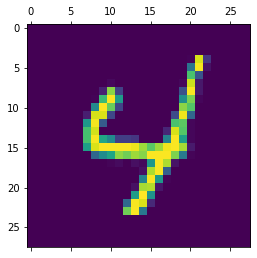

In [86]:
n = 192
plt.matshow(np.reshape(test[n], (28, 28)))
print(ret[n])

In [79]:
d = {'ImageId': [i for i in range(1, test_data.shape[0] + 1)], 'Label': ret}
df = pd.DataFrame(data=d)

In [81]:
df.to_csv(r'result.csv', index = False)